In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pylab as pl

#Used for confusion matrix
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.ensemble import RandomForestClassifier

C:\Users\saira_p\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('Telecom.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['OnlineBackup'].describe()

count     7043
unique       3
top         No
freq      3088
Name: OnlineBackup, dtype: object

In [9]:
dftest = pd.DataFrame({'a':[1,2,np.nan], 'b':[np.nan,1,np.nan]})

In [10]:
dftest.isnull().sum()

a    1
b    2
dtype: int64

In [11]:
del dftest

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NaN values in this dataset!!!

In [13]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [16]:
print (df['TotalCharges'].apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
5       <class 'str'>
6       <class 'str'>
7       <class 'str'>
8       <class 'str'>
9       <class 'str'>
10      <class 'str'>
11      <class 'str'>
12      <class 'str'>
13      <class 'str'>
14      <class 'str'>
15      <class 'str'>
16      <class 'str'>
17      <class 'str'>
18      <class 'str'>
19      <class 'str'>
20      <class 'str'>
21      <class 'str'>
22      <class 'str'>
23      <class 'str'>
24      <class 'str'>
25      <class 'str'>
26      <class 'str'>
27      <class 'str'>
28      <class 'str'>
29      <class 'str'>
            ...      
7013    <class 'str'>
7014    <class 'str'>
7015    <class 'str'>
7016    <class 'str'>
7017    <class 'str'>
7018    <class 'str'>
7019    <class 'str'>
7020    <class 'str'>
7021    <class 'str'>
7022    <class 'str'>
7023    <class 'str'>
7024    <class 'str'>
7025    <class 'str'>
7026    <class 'str'>
7027    <c

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Replacing all Blank/empty cells in the dataframe with NaNs

In [19]:
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Displaying all rows with atleast one NaN 

In [22]:
RowsWithAtleast1NAN = df[df.isnull().any(axis=1)]
RowsWithAtleast1NAN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# Conversion of 'TotalCharges' from string to float

In [23]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [25]:
df['TotalCharges'].dtypes

dtype('float64')

In [26]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Let me think about how I handle the 11 rows with NaNs in the TotalCharges column later!

# Data Preparation - Converting categorical variables into numeric categories

In [27]:
pd.value_counts(df['gender'].values, sort=False)
#3488 + 3555 = 7043

Male      3555
Female    3488
dtype: int64

In [28]:
def func(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    return np.nan

df['gender'] = df['gender'].apply(func)
#df['gender'].replace('Female', 1, inplace = True)

In [29]:
pd.value_counts(df['gender'].values, sort=False)

0    3555
1    3488
dtype: int64

Successfully coverted gender into numerical categories

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
print(pd.value_counts(df['Partner'].values, sort=False),'\n')
print(pd.value_counts(df['Dependents'].values, sort=False), '\n')
print(pd.value_counts(df['PhoneService'].values, sort=False), '\n')
print(pd.value_counts(df['InternetService'].values, sort=False), '\n')
print(pd.value_counts(df['OnlineSecurity'].values, sort=False), '\n')
print(pd.value_counts(df['PaperlessBilling'].values, sort=False), '\n')
print(pd.value_counts(df['Churn'].values, sort=False), '\n')
print(pd.value_counts(df['Contract'].values, sort=False), '\n')

Yes    3402
No     3641
dtype: int64 

Yes    2110
No     4933
dtype: int64 

Yes    6361
No      682
dtype: int64 

DSL            2421
Fiber optic    3096
No             1526
dtype: int64 

No internet service    1526
Yes                    2019
No                     3498
dtype: int64 

Yes    4171
No     2872
dtype: int64 

Yes    1869
No     5174
dtype: int64 

One year          1473
Two year          1695
Month-to-month    3875
dtype: int64 



The variables with just two categories:
1. Partner
2. Dependents
3. PhoneService
4. PaperlessBilling
5. Churn

In [32]:
def func2cat(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    return np.nan

Above is the function to convert 2-category variables into binary variables

In [33]:
df['Partner'] = df['Partner'].apply(func2cat)
df['Dependents'] = df['Dependents'].apply(func2cat)
df['PhoneService'] = df['PhoneService'].apply(func2cat)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(func2cat)
df['Churn'] = df['Churn'].apply(func2cat)

In [34]:
print(pd.value_counts(df['Partner'].values, sort=False),'\n')
print(pd.value_counts(df['Dependents'].values, sort=False), '\n')
print(pd.value_counts(df['PhoneService'].values, sort=False), '\n')
print(pd.value_counts(df['InternetService'].values, sort=False), '\n')
print(pd.value_counts(df['OnlineSecurity'].values, sort=False), '\n')
print(pd.value_counts(df['PaperlessBilling'].values, sort=False), '\n')
print(pd.value_counts(df['Churn'].values, sort=False), '\n')
print(pd.value_counts(df['Contract'].values, sort=False), '\n')

0    3641
1    3402
dtype: int64 

0    4933
1    2110
dtype: int64 

0     682
1    6361
dtype: int64 

DSL            2421
Fiber optic    3096
No             1526
dtype: int64 

No internet service    1526
Yes                    2019
No                     3498
dtype: int64 

0    2872
1    4171
dtype: int64 

0    5174
1    1869
dtype: int64 

One year          1473
Two year          1695
Month-to-month    3875
dtype: int64 



Successfully converted all of the the variables with just two categories into binary ones. They are:
1. Partner
2. Dependents
3. PhoneService
4. PaperlessBilling
5. Churn

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [36]:
print(pd.value_counts(df['MultipleLines'].values, sort=False),'\n')
print(pd.value_counts(df['OnlineSecurity'].values, sort=False), '\n')
print(pd.value_counts(df['OnlineBackup'].values, sort=False), '\n')
print(pd.value_counts(df['DeviceProtection'].values, sort=False), '\n')
print(pd.value_counts(df['TechSupport'].values, sort=False), '\n')
print(pd.value_counts(df['StreamingTV'].values, sort=False), '\n')
print(pd.value_counts(df['StreamingMovies'].values, sort=False), '\n')

Yes                 2971
No phone service     682
No                  3390
dtype: int64 

No internet service    1526
Yes                    2019
No                     3498
dtype: int64 

No internet service    1526
Yes                    2429
No                     3088
dtype: int64 

No internet service    1526
Yes                    2422
No                     3095
dtype: int64 

No internet service    1526
Yes                    2044
No                     3473
dtype: int64 

No internet service    1526
Yes                    2707
No                     2810
dtype: int64 

No internet service    1526
Yes                    2732
No                     2785
dtype: int64 



In [37]:
def func2for3catn(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    return 2

In [38]:
df['MultipleLines'] = df['MultipleLines'].apply(func2for3catn)
df['OnlineSecurity'] = df['OnlineSecurity'].apply(func2for3catn)
df['OnlineBackup'] = df['OnlineBackup'].apply(func2for3catn)
df['DeviceProtection'] = df['DeviceProtection'].apply(func2for3catn)
df['TechSupport'] = df['TechSupport'].apply(func2for3catn)
df['StreamingTV'] = df['StreamingTV'].apply(func2for3catn)
df['StreamingMovies'] = df['StreamingMovies'].apply(func2for3catn)

In [39]:
print(pd.value_counts(df['MultipleLines'].values, sort=False),'\n')
print(pd.value_counts(df['OnlineSecurity'].values, sort=False), '\n')
print(pd.value_counts(df['OnlineBackup'].values, sort=False), '\n')
print(pd.value_counts(df['DeviceProtection'].values, sort=False), '\n')
print(pd.value_counts(df['TechSupport'].values, sort=False), '\n')
print(pd.value_counts(df['StreamingTV'].values, sort=False), '\n')
print(pd.value_counts(df['StreamingMovies'].values, sort=False), '\n')

0    3390
1    2971
2     682
dtype: int64 

0    3498
1    2019
2    1526
dtype: int64 

0    3088
1    2429
2    1526
dtype: int64 

0    3095
1    2422
2    1526
dtype: int64 

0    3473
1    2044
2    1526
dtype: int64 

0    2810
1    2707
2    1526
dtype: int64 

0    2785
1    2732
2    1526
dtype: int64 



In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [41]:
print(pd.value_counts(df['InternetService'].values, sort=False), '\n')
print(pd.value_counts(df['Contract'].values, sort=False), '\n')
print(pd.value_counts(df['PaymentMethod'].values, sort=False), '\n')

DSL            2421
Fiber optic    3096
No             1526
dtype: int64 

One year          1473
Two year          1695
Month-to-month    3875
dtype: int64 

Bank transfer (automatic)    1544
Electronic check             2365
Credit card (automatic)      1522
Mailed check                 1612
dtype: int64 



In [42]:
df['InternetService'].replace('No', 0, inplace=True)
df['InternetService'].replace('DSL', 1, inplace=True)
df['InternetService'].replace('Fiber optic', 2, inplace=True)

In [43]:
print(pd.value_counts(df['InternetService'].values, sort=False), '\n')

0    1526
1    2421
2    3096
dtype: int64 



In [44]:
df['Contract'].replace('One year', 1, inplace=True)
df['Contract'].replace('Two year', 2, inplace=True)
df['Contract'].replace('Month-to-month', 0, inplace=True)

In [45]:
print(pd.value_counts(df['Contract'].values, sort=False), '\n')

0    3875
1    1473
2    1695
dtype: int64 



In [46]:
print(pd.value_counts(df['PaymentMethod'].values, sort=False), '\n')

Bank transfer (automatic)    1544
Electronic check             2365
Credit card (automatic)      1522
Mailed check                 1612
dtype: int64 



In [47]:
df['PaymentMethod'].replace('Mailed check', 0, inplace=True)
df['PaymentMethod'].replace('Electronic check', 1, inplace=True)
df['PaymentMethod'].replace('Bank transfer (automatic)', 2, inplace=True)
df['PaymentMethod'].replace('Credit card (automatic)', 3, inplace=True)

In [48]:
print(pd.value_counts(df['PaymentMethod'].values, sort=False), '\n')

0    1612
1    2365
2    1544
3    1522
dtype: int64 



In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,1,70.70,151.65,1


In [50]:
#df[; (6,22)].head()
df.iloc[:, 6:22].head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [51]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,1,0,1,1,0,0,2,1,1,...,1,1,1,0,2,1,2,52.55,NaN,0
753,3115-CZMZD,0,0,0,1,0,1,0,0,2,...,2,2,2,2,2,0,0,20.25,NaN,0
936,5709-LVOEQ,1,0,1,1,0,1,0,1,1,...,1,0,1,1,2,0,0,80.85,NaN,0
1082,4367-NUYAO,0,0,1,1,0,1,1,0,2,...,2,2,2,2,2,0,0,25.75,NaN,0
1340,1371-DWPAZ,1,0,1,1,0,0,2,1,1,...,1,1,1,0,2,0,3,56.05,NaN,0
3331,7644-OMVMY,0,0,1,1,0,1,0,0,2,...,2,2,2,2,2,0,0,19.85,NaN,0
3826,3213-VVOLG,0,0,1,1,0,1,1,0,2,...,2,2,2,2,2,0,0,25.35,NaN,0
4380,2520-SGTTA,1,0,1,1,0,1,0,0,2,...,2,2,2,2,2,0,0,20.00,NaN,0
5218,2923-ARZLG,0,0,1,1,0,1,0,0,2,...,2,2,2,2,1,1,0,19.70,NaN,0
6670,4075-WKNIU,1,0,1,1,0,1,1,1,0,...,1,1,1,0,2,0,0,73.35,NaN,0


In [53]:
print(df['customerID'].count())
print(df['customerID'].nunique())

7043
7043


In [54]:
df[df['TotalCharges'] < df['MonthlyCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


So, this confirms we have no rows in which MonthlyCharges are higher than TotalCharges

In [55]:
#df.to_csv('Data1.csv')

1. All categories represented by numerals
2. Clean dataframe (but with the 11 rows with NaNs) is written in the file 'Data1.csv'

# Let me drop the 11 rows with at least one NaN value and write the resulting dataframe into a new csv file

In [56]:
#df = df.dropna(axis=0, how='any')

In [57]:
#df.shape

In [58]:
#df['customerID'].nunique()

In [59]:
#df.isnull().sum()

In [60]:
#df.to_csv('Data2.csv')

Clean dataframe with NO NaN values written into a CSV file 'Data2.csv'

In [61]:
df[['MonthlyCharges', 'tenure', 'TotalCharges']][(df['tenure'] == 0)]

,MonthlyCharges,tenure,TotalCharges
488,52.55,0,NaN
753,20.25,0,NaN
936,80.85,0,NaN
1082,25.75,0,NaN
1340,56.05,0,NaN
3331,19.85,0,NaN
3826,25.35,0,NaN
4380,20.00,0,NaN
5218,19.70,0,NaN
6670,73.35,0,NaN


# Total Charges = Monthly Charges * Tenure

In [62]:
index = df['TotalCharges'].index[df['TotalCharges'].apply(np.isnan)]

In [63]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
df.TotalCharges.fillna(df.MonthlyCharges * df.tenure, inplace=True)
#df[df.isnull().any(axis=1)]['TotalCharges'] = df[df.isnull().any(axis=1)]['MonthlyCharges']

In [65]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Perfect All NaNs replaced by values

In [66]:
df[['MonthlyCharges', 'TotalCharges']].iloc[index]

,MonthlyCharges,TotalCharges
488,52.55,0.0
753,20.25,0.0
936,80.85,0.0
1082,25.75,0.0
1340,56.05,0.0
3331,19.85,0.0
3826,25.35,0.0
4380,20.00,0.0
5218,19.70,0.0
6670,73.35,0.0


All NaNs in TotalCharges replaced by the product of tenure and Monthly charges!!!
Note: Tenure was 0 for these particular rows and that's why the product ended up as 0

In [67]:
#df.to_csv('DataUsedForEDA.csv')

# Exploratory Data Analysis

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,1,70.70,151.65,1


In [68]:
df.shape

(7043, 21)

Text(0.5,1,'Gender Distribution')

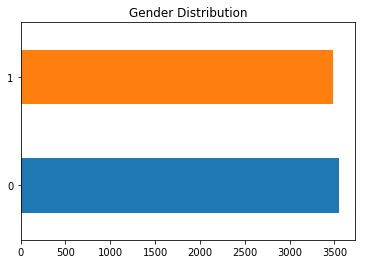

In [69]:
# Lets look at the gender distribution
df['gender'].value_counts().plot.barh().set_title('Gender Distribution')


Males and females are almost equal with males being a bit higher than females!

In [70]:
# pl = round((df['gender'].value_counts(normalize = True) * 100 ),2)
# plt.bar(pl.index, pl, align='center')
# plt.xticks(pl.index)
# plt.ylabel('Percentage')
# plt.xlabel('0:Male AND 1:Female')
# plt.title('Distribution of Gender in percentages')
# for a,b in zip(pl.index, pl):
#     plt.text(a, b, str(b))


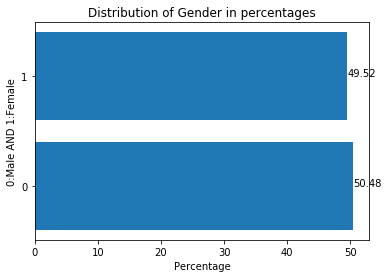

In [71]:
pl = round((df['gender'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Male AND 1:Female')
plt.title('Distribution of Gender in percentages')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The churn rates are very similar among male and female customers

In [72]:
print("The number of Female customers who churned(left within the last month):", df['gender'][(df['gender'] == 1) & (df['Churn'] == 1)].count(), '\n')
print("The percentage of female customers who churned:", round(((df['gender'][(df['gender'] == 1) & (df['Churn'] == 1)].count()) / df['gender'][df['gender'] == 1].count())*100,2),'\n')
print("The number of Male customers who churned(left within the last month):", df['gender'][(df['gender'] == 0) & (df['Churn'] == 1)].count(), '\n')
print("The percentage of Male customers who churned:", round(((df['gender'][(df['gender'] == 0) & (df['Churn'] == 1)].count()) / df['gender'][df['gender'] == 0].count())*100,2))

The number of Female customers who churned(left within the last month): 939 

The percentage of female customers who churned: 26.92 

The number of Male customers who churned(left within the last month): 930 

The percentage of Male customers who churned: 26.16


In [152]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

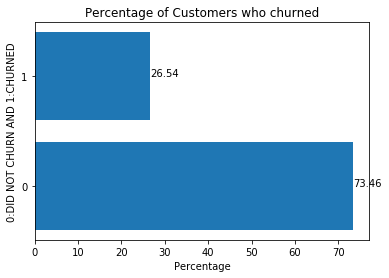

In [73]:
pl = round((df['Churn'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers who churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

26.54% of customers churned in the last month!

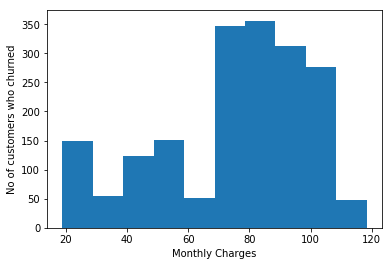

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [74]:
x = df['MonthlyCharges'][df['Churn'] == 1]
plt.hist(x, bins = 10)
plt.ylabel('No of customers who churned')
plt.xlabel('Monthly Charges')
plt.show()
x.describe()

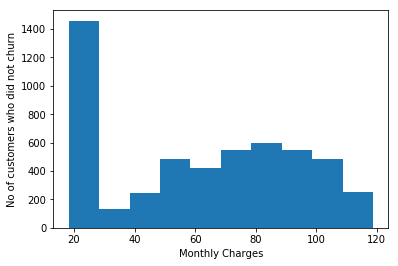

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [75]:
x = df['MonthlyCharges'][df['Churn'] == 0]
plt.hist(x, bins = 10)
plt.ylabel('No of customers who did not churn')
plt.xlabel('Monthly Charges')
plt.show()
x.describe()

Customers who churned paid a higher monthly charge on an average

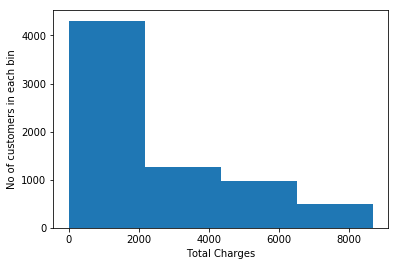

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [76]:
plt.hist(df['TotalCharges'], bins = 4)
plt.ylabel('No of customers in each bin')
plt.xlabel('Total Charges')
plt.show()
df['TotalCharges'].describe()

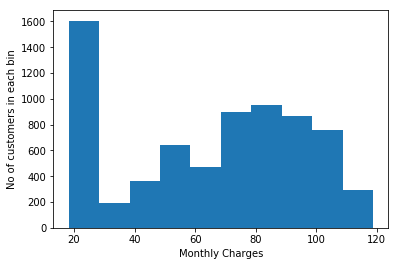

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [77]:
plt.hist(df['MonthlyCharges'], bins = 10)
plt.ylabel('No of customers in each bin')
plt.xlabel('Monthly Charges')
plt.show()
df['MonthlyCharges'].describe()

There are a disproportionately large number of customers who pay between $18-$30 per month

In [78]:
def func(x):
    if x <= 398.55:
        return 0
    elif x <= 1394.55:
        return 1
    elif x <= 3786.60:
        return 2
    elif x <= 8684.80:
        return 3
    return np.nan

df['TotalCharges_Binned'] = df['TotalCharges'].apply(func)

# df['TotalCharges_Binned'] = if df['TotalCharges'] <= 398.55: 
#                             0
#                             elif df['TotalCharges'] <= 1394.55:
#                             1
#                             elif df['TotalCharges'] <= 3786.60:
#                             2
#                             elif df['TotalCharges'] <= max(df['TotalCharges'])
#                             3
#df['TotalCharges_Binned'].isnull().sum()

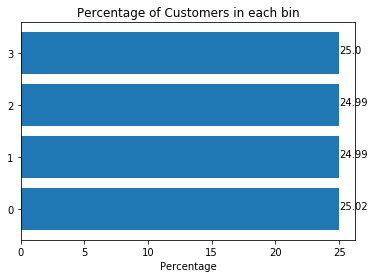

In [79]:
pl = round((df['TotalCharges_Binned'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in each bin')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

In [80]:
def functobinmonthlycharges(x):
    if x <= 35.5:
        return 0
    elif x <= 70.35:
        return 1
    elif x <= 89.85:
        return 2
    elif x <= 118.75:
        return 3
    return np.nan

df['MonthlyCharges_Binned'] = df['MonthlyCharges'].apply(functobinmonthlycharges)

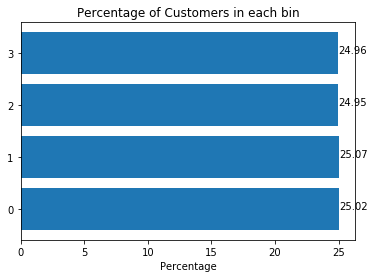

In [81]:
pl = round((df['MonthlyCharges_Binned'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in each bin')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

In [82]:
df['MonthlyCharges_Binned'].isnull().sum()

0

In [83]:
print((df['MonthlyCharges'] * df['tenure']).corr(df['TotalCharges']))
print(df['tenure'].corr(df['TotalCharges']))
print(df['tenure'].corr(df['MonthlyCharges']))

0.9995605537972277
0.8261783979502421
0.2478998562861499


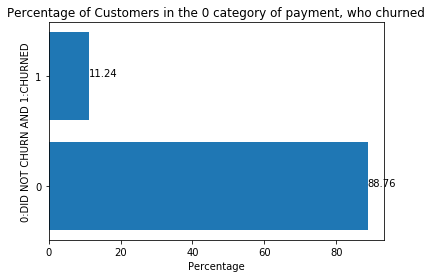

In [84]:
pl = round((df['Churn'][(df['MonthlyCharges_Binned'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in the 0 category of payment, who churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

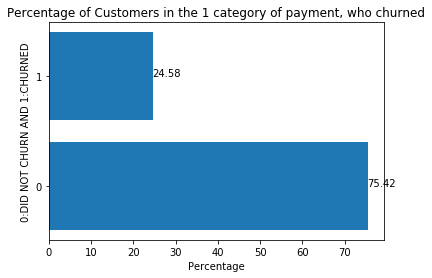

In [85]:
pl = round((df['Churn'][(df['MonthlyCharges_Binned'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in the 1 category of payment, who churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

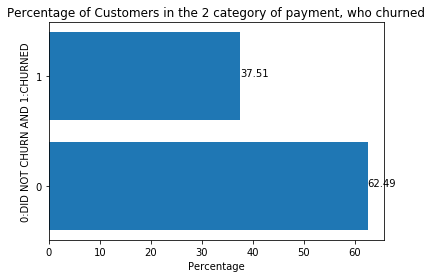

In [86]:
pl = round((df['Churn'][(df['MonthlyCharges_Binned'] == 2)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in the 2 category of payment, who churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

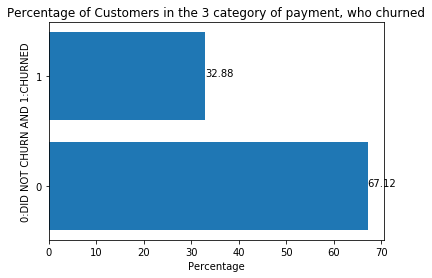

In [87]:
pl = round((df['Churn'][(df['MonthlyCharges_Binned'] == 3)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in the 3 category of payment, who churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The Churn rates are highest among customers in the 2 category payment bracket!
Also, Higher the payment bracket a customer belongs to higher is the churn rate!(Exception category:3)
Customers paying under $89.85 have higher churn rates as they belong to higher bracket of monthly payment
But the highest bracket >$89.85 does not have the highest churn rates
This implies there might be other reasons apart from payment because of which customers churn!

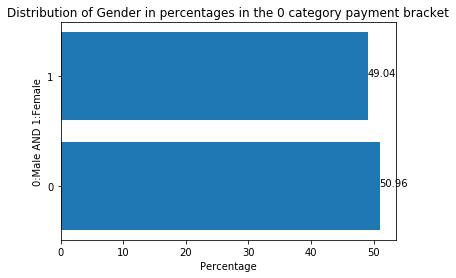

In [88]:
pl = round((df['gender'][(df['MonthlyCharges_Binned'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Male AND 1:Female')
plt.title('Distribution of Gender in percentages in the 0 category payment bracket')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

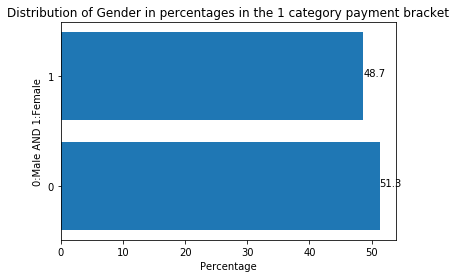

In [89]:
pl = round((df['gender'][(df['MonthlyCharges_Binned'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Male AND 1:Female')
plt.title('Distribution of Gender in percentages in the 1 category payment bracket')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

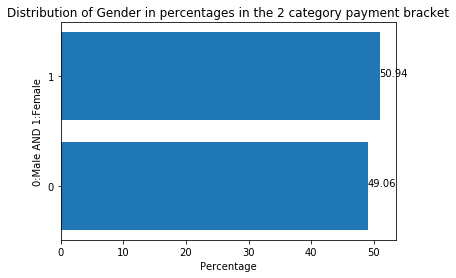

In [90]:
pl = round((df['gender'][(df['MonthlyCharges_Binned'] == 2)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Male AND 1:Female')
plt.title('Distribution of Gender in percentages in the 2 category payment bracket')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

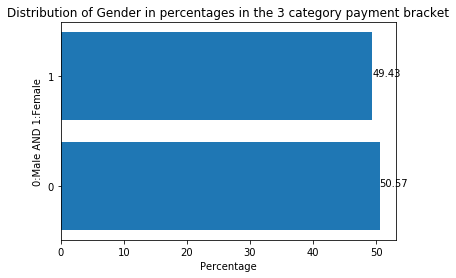

In [91]:
pl = round((df['gender'][(df['MonthlyCharges_Binned'] == 3)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Male AND 1:Female')
plt.title('Distribution of Gender in percentages in the 3 category payment bracket')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The distribution of gender among various payment brackets are very similar! 
Women and men tend are likely to pay equally

In [92]:
max(df['MonthlyCharges'])

118.75

In [93]:
print(df['MonthlyCharges'][df['gender'] == 1].mean())
print(df['MonthlyCharges'][df['gender'] == 1].median())
print(df['MonthlyCharges'][df['gender'] == 0].mean())
print(df['MonthlyCharges'][df['gender'] == 0].median())

65.20424311926602
70.65
64.32748241912773
70.1


Text(0.5,1,'Senior Citizen Distribution')

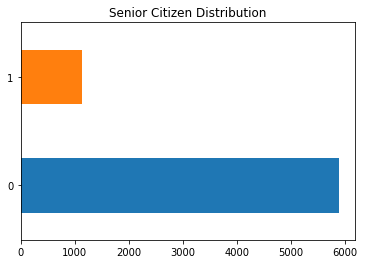

In [94]:
# Lets look at the Senior Citizen distribution
df['SeniorCitizen'].value_counts().plot.barh().set_title('Senior Citizen Distribution')


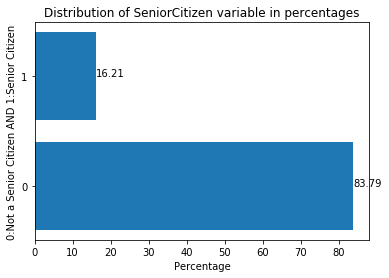

In [95]:
pl = round((df['SeniorCitizen'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Not a Senior Citizen AND 1:Senior Citizen')
plt.title('Distribution of SeniorCitizen variable in percentages')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The majority of your customers are not Senior Citizens
~16% of your customers are senior citizens

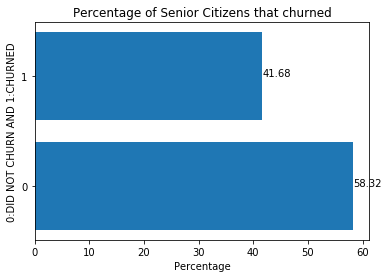

In [96]:
pl = round((df['Churn'][(df['SeniorCitizen'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Senior Citizens that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

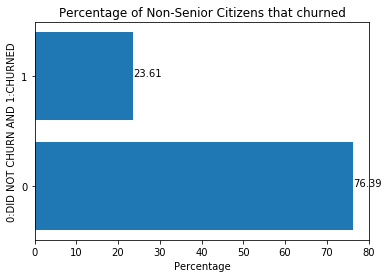

In [97]:
pl = round((df['Churn'][(df['SeniorCitizen'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Non-Senior Citizens that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The churn rates are higher among Senior Citizens compared to Non-Senior Citizens

In [98]:
print("For Senior Citizens: \n",df['MonthlyCharges'][(df['SeniorCitizen'] == 1)].describe(), "\n")
print("For Non-Senior Citizens: \n",df['MonthlyCharges'][(df['SeniorCitizen'] == 0)].describe())

For Senior Citizens: 
 count    1142.000000
mean       79.820359
std        23.764027
min        18.950000
25%        70.150000
50%        84.850000
75%        98.075000
max       117.450000
Name: MonthlyCharges, dtype: float64 

For Non-Senior Citizens: 
 count    5901.000000
mean       61.847441
std        30.316041
min        18.250000
25%        25.600000
50%        65.800000
75%        86.700000
max       118.750000
Name: MonthlyCharges, dtype: float64


An average senior citizen pays more than an average non-senior citizen!

The churn rates are significantly higher among senior citizens (~40% = 2 * 20%). An average senior citizen pays more than an average non-senior citizen. The higher churn might be due to higher monthly charges or because senior citizens are dying at a faster rate.

In [99]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,1,1,29.85,29.85,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,1,0,0,56.95,1889.50,0,2,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,1,0,53.85,108.15,1,0,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,0,1,0,2,42.30,1840.75,0,2,1
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,1,1,70.70,151.65,1,0,2


Text(0.5,1,'Partner Variable Distribution')

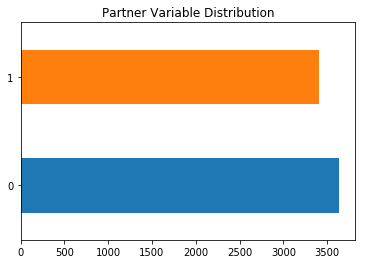

In [100]:
df['Partner'].value_counts().plot.barh().set_title('Partner Variable Distribution')

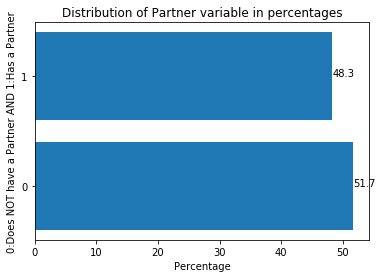

In [101]:
pl = round((df['Partner'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Does NOT have a Partner AND 1:Has a Partner')
plt.title('Distribution of Partner variable in percentages')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

You have almost equal number of customer having and not having partners

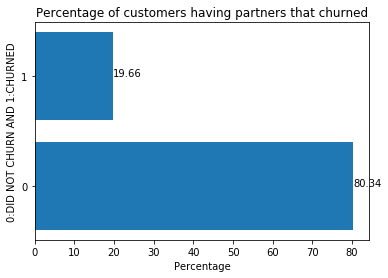

In [102]:
pl = round((df['Churn'][(df['Partner'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of customers having partners that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

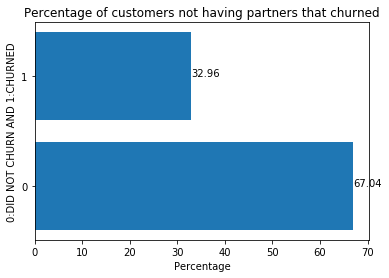

In [103]:
pl = round((df['Churn'][(df['Partner'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of customers not having partners that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

Customers NOT having a partner are more likely to churn than the ones having partners

In [104]:
print("For customer with partners: \n", df['MonthlyCharges'][(df['Partner'] == 1)].describe(), "\n")
print("For customers without partners: \n",df['MonthlyCharges'][(df['Partner'] == 0)].describe())

For customer with partners: 
 count    3402.000000
mean       67.776264
std        30.875503
min        18.400000
25%        39.362500
50%        74.800000
75%        94.050000
max       118.750000
Name: MonthlyCharges, dtype: float64 

For customers without partners: 
 count    3641.000000
mean       61.945001
std        29.060087
min        18.250000
25%        34.050000
50%        68.650000
75%        85.400000
max       118.650000
Name: MonthlyCharges, dtype: float64


Customers with partners pay slighly higher than customer without partners!

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,1,1,29.85,29.85,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,1,0,0,56.95,1889.50,0,2,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,1,0,53.85,108.15,1,0,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,0,1,0,2,42.30,1840.75,0,2,1
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,1,1,70.70,151.65,1,0,2


Text(0.5,1,'Dependents Variable Distribution')

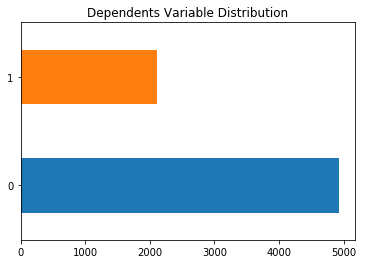

In [106]:
df['Dependents'].value_counts().plot.barh().set_title('Dependents Variable Distribution')

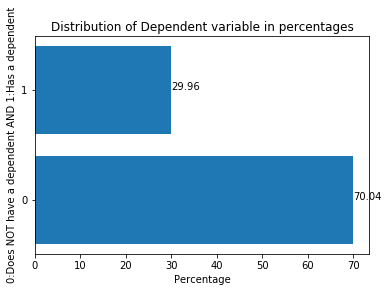

In [107]:
pl = round((df['Dependents'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Does NOT have a dependent AND 1:Has a dependent')
plt.title('Distribution of Dependent variable in percentages')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

Most of your customers do not have dependents

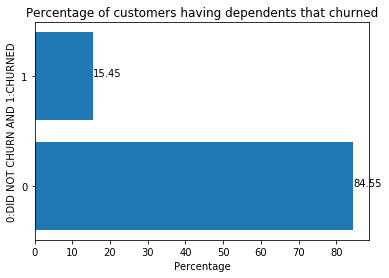

In [108]:
pl = round((df['Churn'][(df['Dependents'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of customers having dependents that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

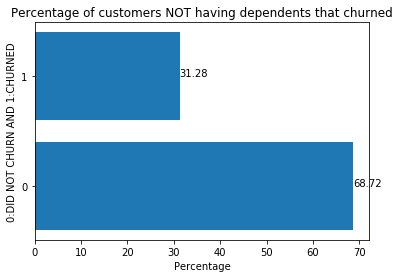

In [109]:
pl = round((df['Churn'][(df['Dependents'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of customers NOT having dependents that churned')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

So, the customers NOT having dependents are more likely to churn!

In [110]:
print("For customer with dependents: \n", df['MonthlyCharges'][(df['Dependents'] == 1)].describe(), "\n")
print("For customers without dependents: \n",df['MonthlyCharges'][(df['Dependents'] == 0)].describe())

For customer with dependents: 
 count    2110.000000
mean       59.522156
std        31.301735
min        18.700000
25%        24.500000
50%        60.975000
75%        85.950000
max       118.750000
Name: MonthlyCharges, dtype: float64 

For customers without dependents: 
 count    4933.000000
mean       67.002808
std        29.274849
min        18.250000
25%        44.850000
50%        73.900000
75%        90.650000
max       118.650000
Name: MonthlyCharges, dtype: float64


The customers without dependents pay slighly more than the customers with dependents

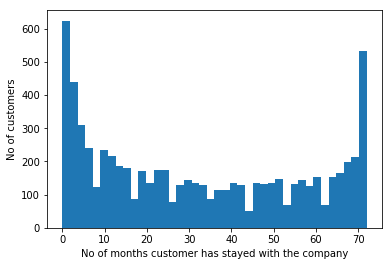

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [111]:
x = df['tenure']
plt.hist(x, bins = 40)
plt.ylabel('No of customers')
plt.xlabel('No of months customer has stayed with the company')
plt.show()
x.describe()

In [112]:
print("Among customers who churned: \n", df['tenure'][(df['Churn'] == 1)].describe(), "\n")
print("Among customers who did NOT churn: \n", df['tenure'][(df['Churn'] == 0)].describe())

Among customers who churned: 
 count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64 

Among customers who did NOT churn: 
 count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


Customers typically tend to churn 17 months after they joined and the customers who did not churn in the last month have a higher average tenure of 37.5 months

In [113]:
print("Among Female customers: \n", df['tenure'][(df['gender'] == 1)].describe(), "\n")
print("Among Male customers: \n", df['tenure'][(df['gender'] == 0)].describe())

Among Female customers: 
 count    3488.000000
mean       32.244553
std        24.463233
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64 

Among Male customers: 
 count    3555.000000
mean       32.495359
std        24.656359
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


The average tenures are same among male and female customers

In [114]:
print("Among Senior Citizens: \n", df['tenure'][(df['SeniorCitizen'] == 1)].describe(), "\n")
print("Among Non-Senior Citizens: \n", df['tenure'][(df['SeniorCitizen'] == 0)].describe())

Among Senior Citizens: 
 count    1142.000000
mean       33.295972
std        24.188530
min         1.000000
25%        10.000000
50%        31.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64 

Among Non-Senior Citizens: 
 count    5901.000000
mean       32.192171
std        24.628639
min         0.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


The average tenures are pretty similar among senior and non-senior citizens

In [115]:
print("Among 0 Category Payment: \n", df['tenure'][(df['MonthlyCharges_Binned'] == 0)].describe(), "\n")
print("Among 1 Category Payment: \n", df['tenure'][(df['MonthlyCharges_Binned'] == 1)].describe(), "\n")
print("Among 2 Category Payment: \n", df['tenure'][(df['MonthlyCharges_Binned'] == 2)].describe(), "\n")
print("Among 3 Category Payment: \n", df['tenure'][(df['MonthlyCharges_Binned'] == 3)].describe(), "\n")

Among 0 Category Payment: 
 count    1762.000000
mean       28.542565
std        24.009785
min         0.000000
25%         6.000000
50%        23.000000
75%        49.750000
max        72.000000
Name: tenure, dtype: float64 

Among 1 Category Payment: 
 count    1766.000000
mean       26.560023
std        23.226452
min         0.000000
25%         5.000000
50%        20.000000
75%        46.000000
max        72.000000
Name: tenure, dtype: float64 

Among 2 Category Payment: 
 count    1757.000000
mean       29.672168
std        24.172067
min         0.000000
25%         7.000000
50%        24.000000
75%        51.000000
max        72.000000
Name: tenure, dtype: float64 

Among 3 Category Payment: 
 count    1758.000000
mean       44.743458
std        22.466155
min         1.000000
25%        26.000000
50%        49.000000
75%        65.000000
max        72.000000
Name: tenure, dtype: float64 



In [116]:
print(df['tenure'].corr(df['MonthlyCharges']))
print(df['tenure'].corr(df['MonthlyCharges_Binned']))

0.2478998562861499
0.23535936555298453


Looking at the descriptive stats and pearson correlation coefficient, we can say that the tenure does not have much of an association with how much customers pay monthly

In [117]:
print("Among Customers that have partners: \n", df['tenure'][(df['Partner'] == 1)].describe(), "\n")
print("Among Customers that DON'T have partners: \n", df['tenure'][(df['Partner'] == 0)].describe())

Among Customers that have partners: 
 count    3402.000000
mean       42.017637
std        23.698742
min         0.000000
25%        21.000000
50%        46.000000
75%        65.000000
max        72.000000
Name: tenure, dtype: float64 

Among Customers that DON'T have partners: 
 count    3641.000000
mean       23.357869
std        21.769526
min         0.000000
25%         4.000000
50%        16.000000
75%        39.000000
max        72.000000
Name: tenure, dtype: float64


Customers having partners are likely to stay longer with the company

In [118]:
print("Among Customers that have dependents: \n", df['tenure'][(df['Dependents'] == 1)].describe(), "\n")
print("Among Customers that DON'T have dependents: \n", df['tenure'][(df['Dependents'] == 0)].describe())

Among Customers that have dependents: 
 count    2110.000000
mean       38.368246
std        24.213340
min         0.000000
25%        16.000000
50%        39.000000
75%        62.000000
max        72.000000
Name: tenure, dtype: float64 

Among Customers that DON'T have dependents: 
 count    4933.000000
mean       29.806000
std        24.259877
min         1.000000
25%         7.000000
50%        25.000000
75%        52.000000
max        72.000000
Name: tenure, dtype: float64


Customers with dependents likely to stay longer with the company

In [119]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,1,1,29.85,29.85,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,1,0,0,56.95,1889.50,0,2,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,1,0,53.85,108.15,1,0,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,0,1,0,2,42.30,1840.75,0,2,1
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,1,1,70.70,151.65,1,0,2


In [120]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [121]:
def funtobintenure(x):
    if x <= 9.0:
        return 0
    elif x <= 29.0:
        return 1
    elif x <= 55.0:
        return 2
    elif x <= 72:
        return 3
    return np.nan
df['tenure_Binned'] = df['tenure'].apply(funtobintenure)

In [122]:
df['tenure_Binned'].isnull().sum()

0

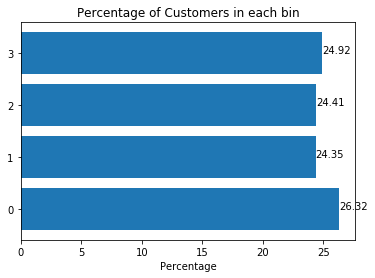

In [123]:
pl = round((df['tenure_Binned'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers in each bin')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

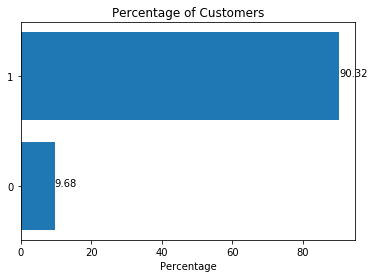

In [124]:
pl = round((df['PhoneService'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

A mojority of your customers have phone service

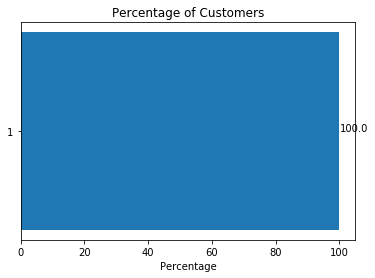

In [125]:
pl = round((df['InternetService'][(df['PhoneService'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Percentage of Customers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

All customers who do not have a phone service have an Internet Service

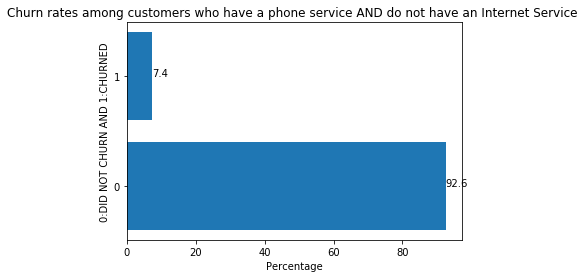

In [126]:
pl = round((df['Churn'][(df['PhoneService'] == 1)&(df['InternetService'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Churn rates among customers who have a phone service AND do not have an Internet Service ')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

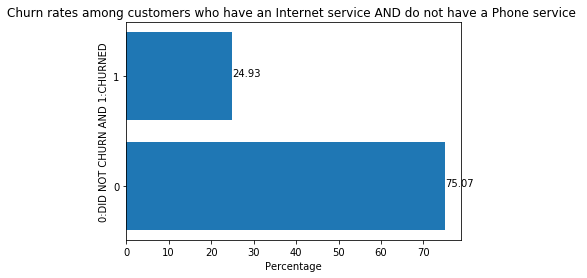

In [127]:
pl = round((df['Churn'][(df['PhoneService'] == 0)&(df['InternetService'] != 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Churn rates among customers who have an Internet service AND do not have a Phone service ')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The Churn rates are significantly higher among customers who have an Internet service vs. Phone service. Is there a problem with Internet service? Look into it!

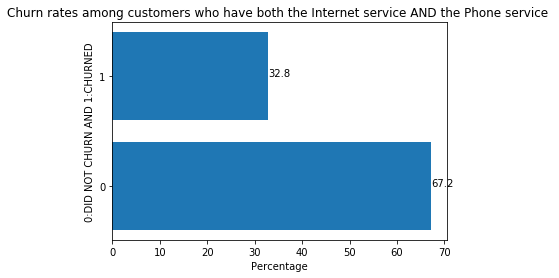

In [128]:
pl = round((df['Churn'][(df['PhoneService'] == 1)&(df['InternetService'] != 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:DID NOT CHURN AND 1:CHURNED')
plt.title('Churn rates among customers who have both the Internet service AND the Phone service ')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

Customer using both the services are more likely to churn than customers using either one of the sevices only

In [129]:
print("Among Customers that have just the phone service: \n", df['MonthlyCharges'][(df['PhoneService'] == 1)&(df['InternetService'] == 0)].describe(), "\n")
print("Among Customers that have just the Internet service: \n", df['MonthlyCharges'][(df['PhoneService'] == 0)&(df['InternetService'] == 1)].describe(), "\n")
print("Among Customers that have both the Internet and Phone service: \n", df['MonthlyCharges'][(df['PhoneService'] == 1)&(df['InternetService'] == 1)].describe(), "\n")

Among Customers that have just the phone service: 
 count    1526.000000
mean       21.079194
std         2.164221
min        18.250000
25%        19.700000
50%        20.150000
75%        20.900000
max        26.900000
Name: MonthlyCharges, dtype: float64 

Among Customers that have just the Internet service: 
 count    682.000000
mean      42.028592
std       11.419585
min       23.450000
25%       33.600000
50%       40.575000
75%       50.737500
max       67.200000
Name: MonthlyCharges, dtype: float64 

Among Customers that have both the Internet and Phone service: 
 count    1739.000000
mean       64.405894
std        13.261756
min        42.900000
25%        54.150000
50%        63.700000
75%        74.825000
max        94.800000
Name: MonthlyCharges, dtype: float64 



Customers who have the Internet and Phone service pay the highest followed by Internet and then by phone users

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned,tenure_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,1,1,29.85,29.85,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,1,0,0,56.95,1889.50,0,2,1,2
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,0,53.85,108.15,1,0,1,0
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,1,0,2,42.30,1840.75,0,2,1,2
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,1,70.70,151.65,1,0,2,0


Text(0.5,1,'Contracts Variable Distribution')

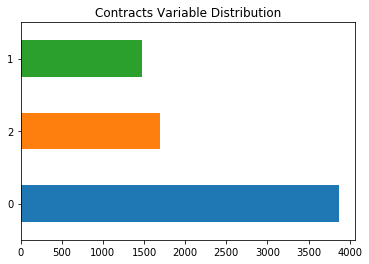

In [131]:
df['Contract'].value_counts().plot.barh().set_title('Contracts Variable Distribution')

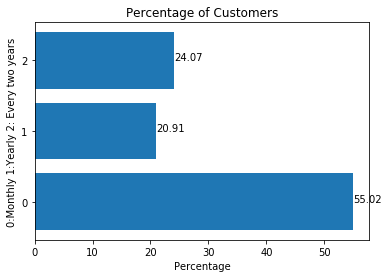

In [132]:
pl = round((df['Contract'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Monthly 1:Yearly 2: Every two years')
plt.title('Percentage of Customers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

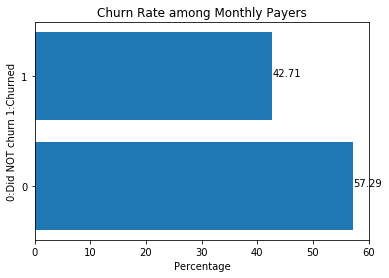

In [133]:
pl = round((df['Churn'][(df['Contract'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Did NOT churn 1:Churned')
plt.title('Churn Rate among Monthly Payers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

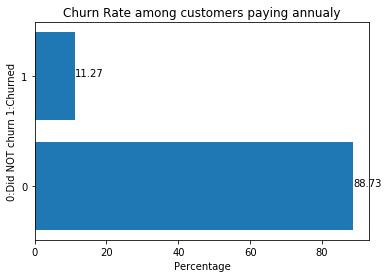

In [134]:
pl = round((df['Churn'][(df['Contract'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Did NOT churn 1:Churned')
plt.title('Churn Rate among customers paying annualy')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

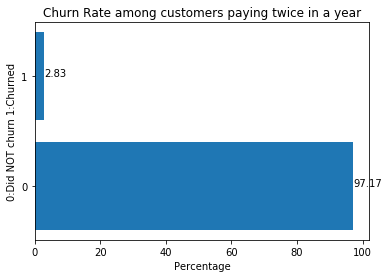

In [135]:
pl = round((df['Churn'][(df['Contract'] == 2)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Did NOT churn 1:Churned')
plt.title('Churn Rate among customers paying twice in a year')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

Customers who pay monthy are more likely to churn than customers who pay yearly or once every two years

In [136]:
print("Among Customers that have a monthly contract: \n", df['MonthlyCharges'][(df['Contract'] == 0)].describe(), "\n")
print("Among Customers that have an yearly contract: \n", df['MonthlyCharges'][(df['Contract'] == 1)].describe(), "\n")
print("Among Customers that have a once in 2-years contract: \n", df['MonthlyCharges'][(df['Contract'] == 2)].describe(), "\n")

Among Customers that have a monthly contract: 
 count    3875.000000
mean       66.398490
std        26.926599
min        18.750000
25%        45.850000
50%        73.250000
75%        88.875000
max       117.450000
Name: MonthlyCharges, dtype: float64 

Among Customers that have an yearly contract: 
 count    1473.000000
mean       65.048608
std        31.840539
min        18.250000
25%        26.900000
50%        68.750000
75%        94.800000
max       118.600000
Name: MonthlyCharges, dtype: float64 

Among Customers that have a once in 2-years contract: 
 count    1695.000000
mean       60.770413
std        34.678865
min        18.400000
25%        24.025000
50%        64.350000
75%        90.450000
max       118.750000
Name: MonthlyCharges, dtype: float64 



Customers who paying monthly, yearly or bi-yearly all pay nearly the same on an average

Text(0.5,1,'Paperless Billing Variable Distribution')

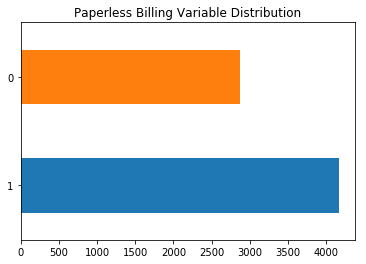

In [137]:
df['PaperlessBilling'].value_counts().plot.barh().set_title('Paperless Billing Variable Distribution')

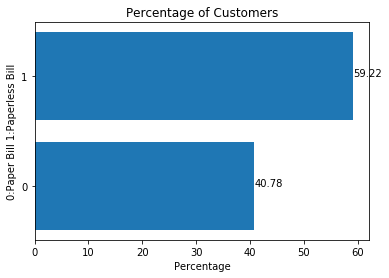

In [138]:
pl = round((df['PaperlessBilling'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
plt.ylabel('0:Paper Bill 1:Paperless Bill')
plt.title('Percentage of Customers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

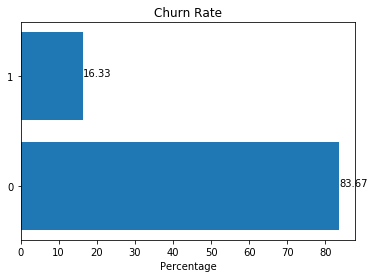

In [139]:
pl = round((df['Churn'][(df['PaperlessBilling'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

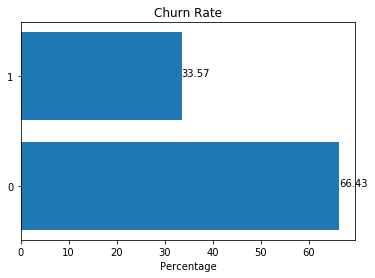

In [140]:
pl = round((df['Churn'][(df['PaperlessBilling'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

Churn rate is higher among customers who do paperless billing compared to paper bill

In [141]:
print("Among Customers that subscribed to paper billing: \n", df['MonthlyCharges'][(df['PaperlessBilling'] == 0)].describe(), "\n")
print("Among Customers that subscribed to paperless billing: \n", df['MonthlyCharges'][(df['PaperlessBilling'] == 1)].describe(), "\n")

Among Customers that subscribed to paper billing: 
 count    2872.000000
mean       51.992967
std        29.697871
min        18.250000
25%        20.450000
50%        50.175000
75%        78.125000
max       118.600000
Name: MonthlyCharges, dtype: float64 

Among Customers that subscribed to paperless billing: 
 count    4171.000000
mean       73.553776
std        27.058482
min        18.550000
25%        54.925000
50%        79.450000
75%        94.925000
max       118.750000
Name: MonthlyCharges, dtype: float64 



Customers who do paperless billing pay more on average

Text(0.5,1,'PaymentMethod Billing Variable Distribution')

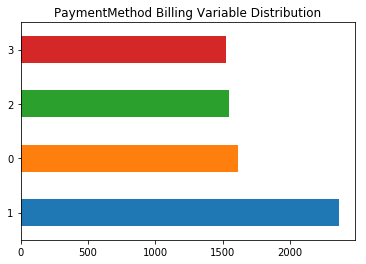

In [142]:
df['PaymentMethod'].value_counts().plot.barh().set_title('PaymentMethod Billing Variable Distribution')

df['PaymentMethod'].replace('Mailed check', 0, inplace=True)
df['PaymentMethod'].replace('Electronic check', 1, inplace=True)
df['PaymentMethod'].replace('Bank transfer (automatic)', 2, inplace=True)
df['PaymentMethod'].replace('Credit card (automatic)', 3, inplace=True)

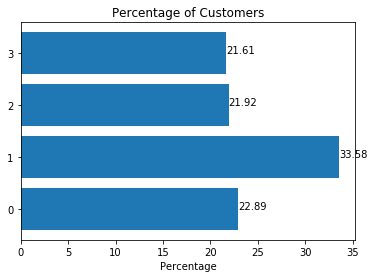

In [143]:
pl = round((df['PaymentMethod'].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('0:Paper Bill 1:Paperless Bill')
plt.title('Percentage of Customers')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

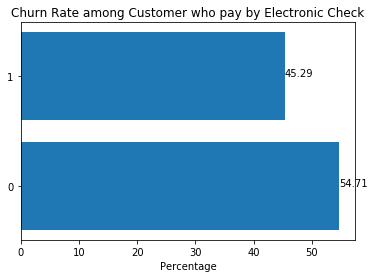

In [144]:
pl = round((df['Churn'][(df['PaymentMethod'] == 1)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate among Customer who pay by Electronic Check')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

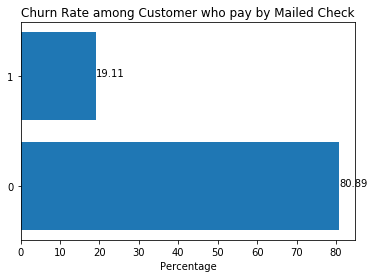

In [145]:
pl = round((df['Churn'][(df['PaymentMethod'] == 0)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate among Customer who pay by Mailed Check')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

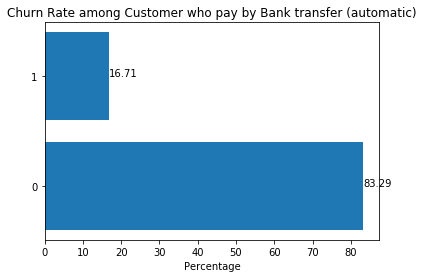

In [146]:
pl = round((df['Churn'][(df['PaymentMethod'] == 2)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate among Customer who pay by Bank transfer (automatic)')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

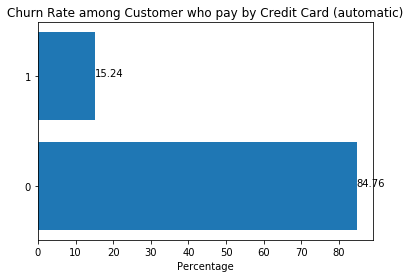

In [147]:
pl = round((df['Churn'][(df['PaymentMethod'] == 3)].value_counts(normalize = True) * 100 ),2)
plt.barh(pl.index,pl)
plt.yticks(pl.index)
plt.xlabel('Percentage')
#plt.ylabel('Percentage')
plt.title('Churn Rate among Customer who pay by Credit Card (automatic)')
for a,b in zip(pl.index, pl):
    plt.text(b, a, str(b))

The churn rate is highest among customer paying by electronic check than all other payment methods

In [148]:
print("Among Customers that pay by Electronic Check: \n", df['MonthlyCharges'][(df['PaymentMethod'] == 0)].describe(), "\n")
print("Among Customers that pay by Mailed Check: \n", df['MonthlyCharges'][(df['PaymentMethod'] == 1)].describe(), "\n")
print("Among Customers that pay by Bank transfer(automatic): \n", df['MonthlyCharges'][(df['PaymentMethod'] == 2)].describe(), "\n")
print("Among Customers that pay by Credit Card(automatic): \n", df['MonthlyCharges'][(df['PaymentMethod'] == 3)].describe(), "\n")

Among Customers that pay by Electronic Check: 
 count    1612.000000
mean       43.917060
std        26.314665
min        18.700000
25%        20.150000
50%        34.700000
75%        64.912500
max       118.600000
Name: MonthlyCharges, dtype: float64 

Among Customers that pay by Mailed Check: 
 count    2365.000000
mean       76.255814
std        24.053655
min        18.850000
25%        60.150000
50%        80.550000
75%        94.700000
max       118.650000
Name: MonthlyCharges, dtype: float64 

Among Customers that pay by Bank transfer(automatic): 
 count    1544.000000
mean       67.192649
std        30.555200
min        18.400000
25%        41.087500
50%        73.100000
75%        92.962500
max       118.750000
Name: MonthlyCharges, dtype: float64 

Among Customers that pay by Credit Card(automatic): 
 count    1522.000000
mean       66.512385
std        30.612424
min        18.250000
25%        38.662500
50%        73.025000
75%        90.850000
max       117.500000
Name: Mon

Mailed check users pay the highest on average. They also have the lowest churn rates. That's pretty good!

-----------------------End of Exploratory Analysis---------------------------------------------------------------

# Modelling starts here!

In [149]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Binned,MonthlyCharges_Binned,tenure_Binned
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,1,1,29.85,29.85,0,0,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,1,0,0,56.95,1889.50,0,2,1,2
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,0,53.85,108.15,1,0,1,0
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,1,0,2,42.30,1840.75,0,2,1,2
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,1,70.70,151.65,1,0,2,0


In [150]:
print("The total number of columns:",len(df.columns))

The total number of columns: 24


In [151]:
df.iloc[:, 20].values

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [152]:
forX = df.drop(['Churn', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_Binned'], axis=1)

In [153]:
forX

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_Binned,tenure_Binned
0,1,0,1,0,0,2,1,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,2
2,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,2,1,1,0,1,1,0,0,1,0,2,1,2
4,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,1,2,0
5,1,0,0,0,1,1,2,0,0,1,0,1,1,0,1,1,3,0
6,0,0,0,1,1,1,2,0,1,0,0,1,0,0,1,3,2,1
7,1,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,1
8,1,0,1,0,1,1,2,0,0,1,1,1,1,0,1,1,3,1
9,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,2,1,3


In [154]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_Binned', 'MonthlyCharges_Binned', 'tenure_Binned'],
      dtype='object')

In [155]:
print(forX.shape)
forX.columns

(7043, 18)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges_Binned', 'tenure_Binned'],
      dtype='object')

In [156]:
X= forX.values
y= df.iloc[:, 20].values

In [157]:
X

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 2, 0],
       [0, 0, 0, ..., 2, 3, 3]], dtype=int64)

In [158]:
correlations = forX.corr()


In [159]:
correlations > 0.9

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_Binned,tenure_Binned
gender,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
SeniorCitizen,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Partner,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Dependents,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PhoneService,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
MultipleLines,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
InternetService,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
OnlineSecurity,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
OnlineBackup,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
DeviceProtection,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [160]:
names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges_Binned', 'tenure_Binned']

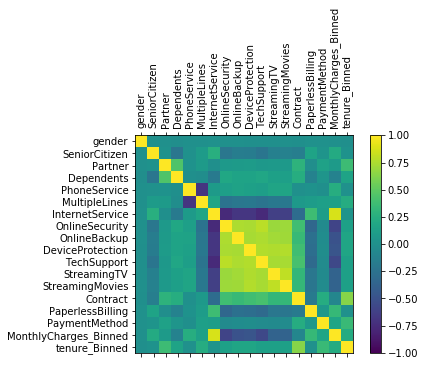

In [161]:

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [162]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [163]:
#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

The various algorithms I am going to use are:
1. Logistic regression (LR)
2. Decision tree
3. Random Forest
4. Bagged decision tree
5. Boosted decision tree
6. Support vector machine (SVM)
7. Ensemble Voting Classifier

Implementing Logistic Regression

In [164]:
#Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

In [165]:
#Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [166]:
#Step 3. Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [168]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
pred = pd.DataFrame(predictions)

In [170]:
pred.columns = ['prediction']

In [171]:
pred['prediction'].value_counts(normalize = True)

0    0.797019
1    0.202981
Name: prediction, dtype: float64

Measuring the model

In [172]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7955997161107168


In [173]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[938 103]
 [185 183]]


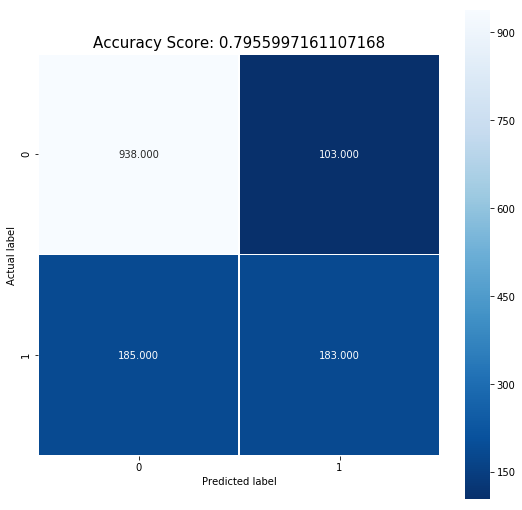

In [174]:
#The confusion matrix below is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1041
          1       0.64      0.50      0.56       368

avg / total       0.78      0.80      0.79      1409



In [176]:
df2 = pd.get_dummies(forX, columns =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges_Binned', 'tenure_Binned'], drop_first = True)

In [177]:
df2.iloc[0:3, 20:50]

,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,MonthlyCharges_Binned_1,MonthlyCharges_Binned_2,MonthlyCharges_Binned_3,tenure_Binned_1,tenure_Binned_2,tenure_Binned_3
0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,0,0,0


In [178]:
print(df2.shape)

(7043, 33)


In [179]:
X= df2.values
y= df.iloc[:, 20].values

In [180]:
print(X)
print()
print(y)

[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]]

[0 0 1 ... 0 1 0]


In [181]:
#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [182]:
#Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [183]:
# Make predictions on entire test data
predictions2 = logisticRegr.predict(x_test)

In [184]:
# Use score method to get accuracy of model
score2 = logisticRegr.score(x_test, y_test)
print(score2)

0.7849538679914834


In [185]:
#Confusion Matrix
cm2 = metrics.confusion_matrix(y_test, predictions2)
print(cm2)

[[935 106]
 [197 171]]


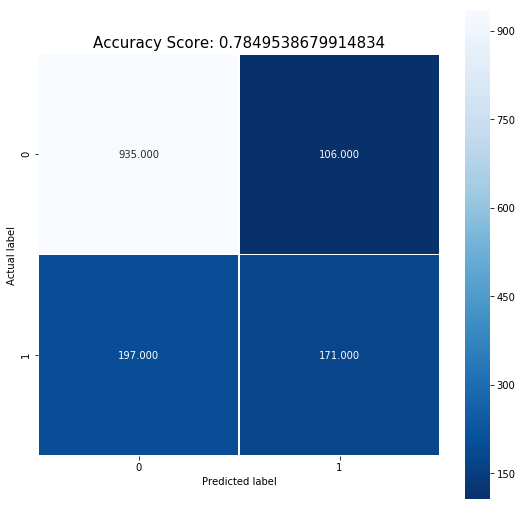

In [186]:
#The confusion matrix below is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

In [187]:
print(classification_report(y_test, predictions2))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1041
          1       0.62      0.46      0.53       368

avg / total       0.77      0.78      0.77      1409



In [188]:
forX['intercept'] = 1.0

logit1 = sm.Logit(df['Churn'], forX)
# fit the model
result1 = logit1.fit()

print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.417984
         Iterations 7
                            Results: Logit
Model:                Logit              No. Iterations:     7.0000   
Dependent Variable:   Churn              Pseudo R-squared:   0.278    
Date:                 2018-10-08 10:08   AIC:                5925.7165
No. Observations:     7043               BIC:                6056.0525
Df Model:             18                 Log-Likelihood:     -2943.9  
Df Residuals:         7024               LL-Null:            -4075.1  
Converged:            1.0000             Scale:              1.0000   
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
gender                 0.0227   0.0646   0.3515 0.7252 -0.1038  0.1492
SeniorCitizen          0.2353   0.0839   2.8040 0.0050  0.0708  0.3997
Par

In [189]:
df2['intercept'] = 1.0
#df2.drop(['intercept'], axis=1, inplace=True)

In [190]:
logit2 = sm.Logit(df['Churn'], df2)

# fit the model
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.414404
         Iterations 9


In [191]:
print(result2.summary2())

                                                    Results: Logit
Model:                                 Logit                              No. Iterations:                     9.0000   
Dependent Variable:                    Churn                              Pseudo R-squared:                   0.284    
Date:                                  2018-10-08 10:08                   AIC:                                5891.2923
No. Observations:                      7043                               BIC:                                6076.5067
Df Model:                              26                                 Log-Likelihood:                     -2918.6  
Df Residuals:                          7016                               LL-Null:                            -4075.1  
Converged:                             1.0000                             Scale:                              1.0000   
---------------------------------------------------------------------------------------------

C:\Users\saira_p\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\saira_p\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\saira_p\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\saira_p\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\saira_p\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [192]:
df2.drop(['intercept','gender_1', 'Partner_1', 'Dependents_1', 'PhoneService_1', 'MultipleLines_1', 'MultipleLines_2', 'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_1', 'DeviceProtection_2', 'PaymentMethod_2', 'PaymentMethod_3', 'MonthlyCharges_Binned_1', 'MonthlyCharges_Binned_2' , 'MonthlyCharges_Binned_3'], axis=1, inplace=True)

0.7927608232789212

[[938 103]
 [189 179]]


             precision    recall  f1-score   support

          0       0.83      0.90      0.87      1041
          1       0.63      0.49      0.55       368

avg / total       0.78      0.79      0.78      1409



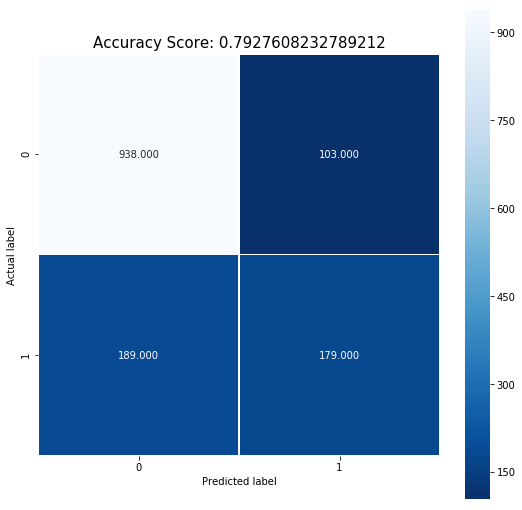

In [193]:
X= df2.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

# Make predictions on entire test data
predictions2 = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score2 = logisticRegr.score(x_test, y_test)
print(score2)
print()
#Confusion Matrix
cm2 = metrics.confusion_matrix(y_test, predictions2)
print(cm2)
print()
#The confusion matrix below is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, predictions2))

In [194]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
print()
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[134.352  71.313 374.476 147.296 286.52  135.56  286.52   17.334 286.52
  16.243 286.52  176.123 488.578 105.681 426.423   2.854  52.128 317.763]

[[0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 1 0]]


In [195]:
forX.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges_Binned', 'tenure_Binned', 'intercept'],
      dtype='object')

In [196]:
Dummiesforall = pd.get_dummies(forX, columns =['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges_Binned', 'tenure_Binned'], drop_first = True)

In [197]:
Dummiesforall.columns

Index(['intercept', 'gender_1', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1',
       'PhoneService_1', 'MultipleLines_1', 'MultipleLines_2',
       'InternetService_1', 'InternetService_2', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_1', 'OnlineBackup_2',
       'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_1',
       'TechSupport_2', 'StreamingTV_1', 'StreamingTV_2', 'StreamingMovies_1',
       'StreamingMovies_2', 'Contract_1', 'Contract_2', 'PaperlessBilling_1',
       'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3',
       'MonthlyCharges_Binned_1', 'MonthlyCharges_Binned_2',
       'MonthlyCharges_Binned_3', 'tenure_Binned_1', 'tenure_Binned_2',
       'tenure_Binned_3'],
      dtype='object')

In [198]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


#df['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])

#Initialize ChiSquare Class
cT = ChiSquare(Dummiesforall)
Dummiesforall['Churn'] = df['Churn']
#Feature Selection
testColumns = ['intercept', 'gender_1', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1',
       'PhoneService_1', 'MultipleLines_1', 'MultipleLines_2',
       'InternetService_1', 'InternetService_2', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_1', 'OnlineBackup_2',
       'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_1',
       'TechSupport_2', 'StreamingTV_1', 'StreamingTV_2', 'StreamingMovies_1',
       'StreamingMovies_2', 'Contract_1', 'Contract_2', 'PaperlessBilling_1',
       'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3',
       'MonthlyCharges_Binned_1', 'MonthlyCharges_Binned_2',
       'MonthlyCharges_Binned_3', 'tenure_Binned_1', 'tenure_Binned_2',
       'tenure_Binned_3']
for var in testColumns:
    cT.TestIndependence(colX=var,colY= 'Churn')  

intercept is NOT an important predictor. (Discard intercept from model)
gender_1 is NOT an important predictor. (Discard gender_1 from model)
SeniorCitizen_1 is IMPORTANT for Prediction
Partner_1 is IMPORTANT for Prediction
Dependents_1 is IMPORTANT for Prediction
PhoneService_1 is NOT an important predictor. (Discard PhoneService_1 from model)
MultipleLines_1 is IMPORTANT for Prediction
MultipleLines_2 is NOT an important predictor. (Discard MultipleLines_2 from model)
InternetService_1 is IMPORTANT for Prediction
InternetService_2 is IMPORTANT for Prediction
OnlineSecurity_1 is IMPORTANT for Prediction
OnlineSecurity_2 is IMPORTANT for Prediction
OnlineBackup_1 is IMPORTANT for Prediction
OnlineBackup_2 is IMPORTANT for Prediction
DeviceProtection_1 is IMPORTANT for Prediction
DeviceProtection_2 is IMPORTANT for Prediction
TechSupport_1 is IMPORTANT for Prediction
TechSupport_2 is IMPORTANT for Prediction
StreamingTV_1 is IMPORTANT for Prediction
StreamingTV_2 is IMPORTANT for Predic

In [199]:
dfonlysigni = Dummiesforall.drop(['intercept', 'gender_1', 'PhoneService_1', 'MultipleLines_2', 'tenure_Binned_1', 'Churn'], axis=1)

In [200]:
dfonlysigni.columns

Index(['SeniorCitizen_1', 'Partner_1', 'Dependents_1', 'MultipleLines_1',
       'InternetService_1', 'InternetService_2', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_1', 'OnlineBackup_2',
       'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_1',
       'TechSupport_2', 'StreamingTV_1', 'StreamingTV_2', 'StreamingMovies_1',
       'StreamingMovies_2', 'Contract_1', 'Contract_2', 'PaperlessBilling_1',
       'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3',
       'MonthlyCharges_Binned_1', 'MonthlyCharges_Binned_2',
       'MonthlyCharges_Binned_3', 'tenure_Binned_2', 'tenure_Binned_3'],
      dtype='object')

0.78708303761533

[[932 109]
 [191 177]]


             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1041
          1       0.62      0.48      0.54       368

avg / total       0.77      0.79      0.78      1409



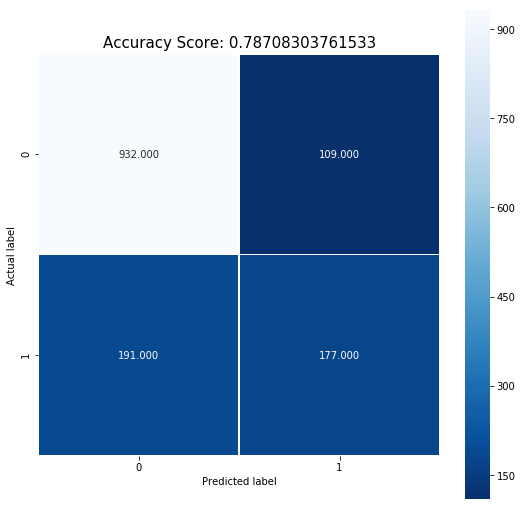

In [201]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

# Make predictions on entire test data
predictions3 = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score3 = logisticRegr.score(x_test, y_test)
print(score3)
print()
#Confusion Matrix
cm3 = metrics.confusion_matrix(y_test, predictions3)
print(cm3)
print()
#The confusion matrix below is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, predictions3))

In [202]:
from sklearn.metrics import mean_squared_error
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [203]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [204]:
from sklearn.model_selection import KFold
data = x_train
target = y_train
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cs:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]

        # instantiate model
        lrco = LogisticRegression(C= c)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lrco)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('C: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(c, round(np.mean(train_errors),4), round(np.mean(validation_errors),4)))

C:  0.001 | mean(train_error):  0.2518 | mean(val_error): 0.2522
C:   0.01 | mean(train_error):  0.2058 | mean(val_error): 0.2077
C:    0.1 | mean(train_error):  0.2003 | mean(val_error): 0.2032
C:      1 | mean(train_error):  0.1989 | mean(val_error): 0.2029
C:     10 | mean(train_error):  0.1987 | mean(val_error): 0.2025
C:    100 | mean(train_error):  0.1987 | mean(val_error): 0.2027
C:   1000 | mean(train_error):  0.1987 | mean(val_error): 0.2027


In [205]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [206]:
lrco = LogisticRegression(C= 10)
lrco.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.7877927608232789
Accuracy in training set: 0.8003194888178914

[[933 108]
 [191 177]]


             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1041
          1       0.62      0.48      0.54       368

avg / total       0.78      0.79      0.78      1409



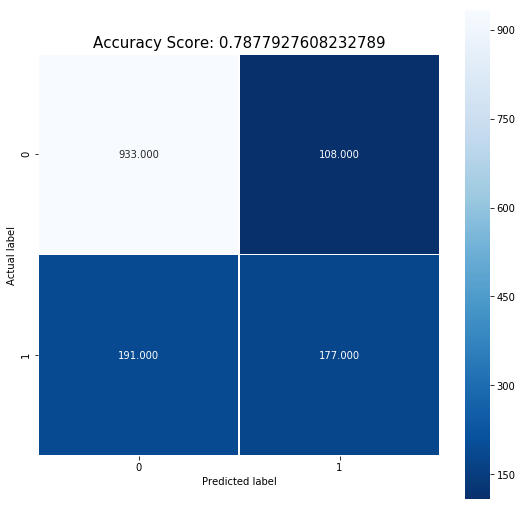

In [207]:
ypred_lrco = lrco.predict(x_test) 
# Use score method to get accuracy of model
score_lrco = lrco.score(x_test, y_test)
score_lrco_training = lrco.score(x_train, y_train)
print(score_lrco)
print("Accuracy in training set:", score_lrco_training)
print()
#Confusion Matrix
cm_lrco = metrics.confusion_matrix(y_test, ypred_lrco)
print(cm_lrco)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_lrco, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_lrco)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_lrco))

In [208]:
print((109 + 177)*100/(191 + 177 + 932 + 109))
print((191 + 177)*100/(191 + 177 + 932 + 109))
#print(177*100/(177+191))

20.298083747338538
26.117814052519517


# Implementing Decision tree algorithm

0.7246273953158269

[[830 211]
 [177 191]]


             precision    recall  f1-score   support

          0       0.82      0.80      0.81      1041
          1       0.48      0.52      0.50       368

avg / total       0.73      0.72      0.73      1409



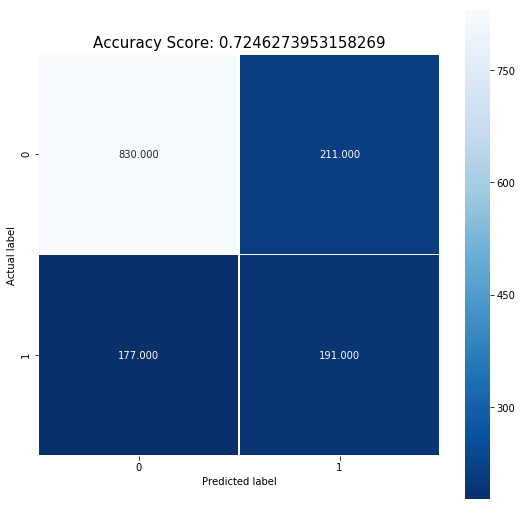

In [209]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)
ypred_DT = classifier.predict(x_test) 
# Use score method to get accuracy of model
score_DT = classifier.score(x_test, y_test)
print(score_DT)
print()
#Confusion Matrix
cm_DT = metrics.confusion_matrix(y_test, ypred_DT)
print(cm_DT)
print()
#The confusion matrix below is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_DT, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_DT)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_DT))

In [210]:
classifier.score(x_train, y_train)

0.9219027334043308

In [215]:
classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [229]:
X= dfonlysigni.values
y= df.iloc[:, 20].values

#Splitting Datasets into Training and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [289]:

import random
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV


hyperparameter_grid = {'criterion': ['gini', 'entropy'],
                       'max_depth': np.linspace(1, 32, 32, endpoint=True),
                       'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
                       'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
                       'max_features': ['auto', 'sqrt', 'log2', None],
                       'class_weight': ['balanced', None]}

# Create the model to use for hyperparameter tuning
model = DecisionTreeClassifier(random_state = 42)

# Set up the random search with 10-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=10, n_iter=64,
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)


In [290]:
# Fit on the training data
random_cv.fit(x_train, y_train)
# Find the best combination of settings
random_cv.best_estimator_

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.3s finished


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=32.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [291]:
print(random_cv.best_score_)

0.7740504082357117


0.7693399574166075
Accuracy in training set: 0.7740504082357117

[[942  99]
 [226 142]]


             precision    recall  f1-score   support

          0       0.81      0.90      0.85      1041
          1       0.59      0.39      0.47       368

avg / total       0.75      0.77      0.75      1409



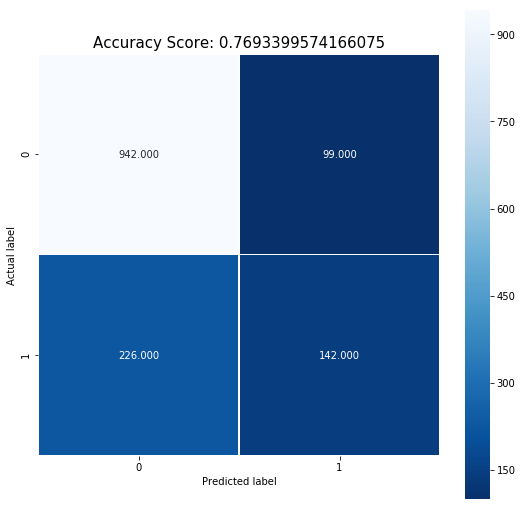

In [292]:
ypred_dtmt = random_cv.predict(x_test) 
# Use score method to get accuracy of model
score_dtmt = random_cv.score(x_test, y_test)
score_dtmt_training = random_cv.score(x_train, y_train)
print(score_dtmt)
print("Accuracy in training set:", score_dtmt_training)
print()
#Confusion Matrix
cm_dtmt = metrics.confusion_matrix(y_test, ypred_dtmt)
print(cm_dtmt)
print()
#The confusion matrix above is not visually super informative or visually appealing.
# Method 1 (Seaborn)
plt.figure(figsize=(9,9))
sns.heatmap(cm_dtmt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_dtmt)
plt.title(all_sample_title, size = 15)

print()
print(classification_report(y_test, ypred_dtmt))